In [46]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

### Loading Dataset

In [47]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

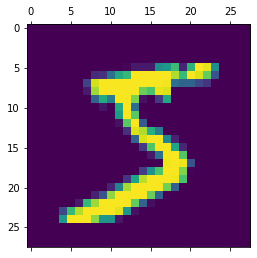

In [48]:
plt.matshow(train_images[0])

In [49]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [50]:
train_images.shape

(60000, 28, 28)

In [51]:
train_labels.shape

(60000,)

### Preparing the image data

In [67]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [53]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [54]:
train_images.shape

(60000, 784)

### Preapring the labels

In [55]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [56]:
train_labels.shape

(60000, 10)

### Initialize the model

In [57]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

### The compilation step

In [58]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

### model training

In [59]:
network.fit(train_images_1d, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 24s 35ms/step - loss: 0.4255 - accuracy: 0.8769
Epoch 2/5
469/469 [==============================] - 17s 37ms/step - loss: 0.1126 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 18s 38ms/step - loss: 0.0724 - accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 17s 36ms/step - loss: 0.0496 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 18s 39ms/step - loss: 0.0365 - accuracy: 0.9891


In [60]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)

313/313 [==============================] - 10s 10ms/step - loss: 0.0767 - accuracy: 0.9765
test_acc:  0.9764999747276306


In [68]:
y_predicted = network.predict(test_images)
y_predicted[0]

array([3.1511568e-08, 4.9098548e-11, 5.3565254e-06, 9.3773117e-05,
       9.6500087e-13, 1.4753163e-08, 3.3321687e-14, 9.9989843e-01,
       1.6580499e-08, 2.3689993e-06], dtype=float32)